# Biochemical Oscillations

In [58]:
from scipy.integrate import solve_ivp
from matplotlib.pyplot import subplots
from numpy import linspace, around, var, ndarray
from scipy.signal import find_peaks

In [63]:
def plot_bifdiagram(results_min_f, results_max_f, 
                    par_set):
    
    N = len(results_min_f)

    fig, ax = subplots(figsize=(6, 4))

    for xe, ye in zip(par_set, results_max_f[0]):

        if not isinstance(ye, ndarray):
            ax.scatter(xe, ye, c='k', s=6, marker='D')
        else:
            ax.scatter([xe] * len(ye), ye, s=3, c='r', marker='D')

    for xe, ye in zip(par_set, results_min_f[0]):

        if not isinstance(ye, ndarray):
            ax.scatter(xe, ye, c='gray', s=6, marker='d')
        else:
            ax.scatter([xe] * len(ye), ye, s=3, c='b', marker='d')


    ax.set_xticks(linspace(par_set[0], par_set[-1], 5));
    ax.set_xticklabels(around(linspace(par_set[0], par_set[-1], 5), 2), fontsize=16);
    ax.set_xlabel('Parameter', fontsize=16)

    ax.set_ylabel('Substrate', fontsize=14)

    y_min, y_max = ax.get_ylim()

    ax.set_yticks(linspace(y_min, y_max, 3));
    ax.set_yticklabels(around(linspace(y_min, y_max, 3),2), fontsize=14);

    fig.tight_layout()
    
    return fig, ax

# Forward inhibition combined with feedback inhibition


## Time Series

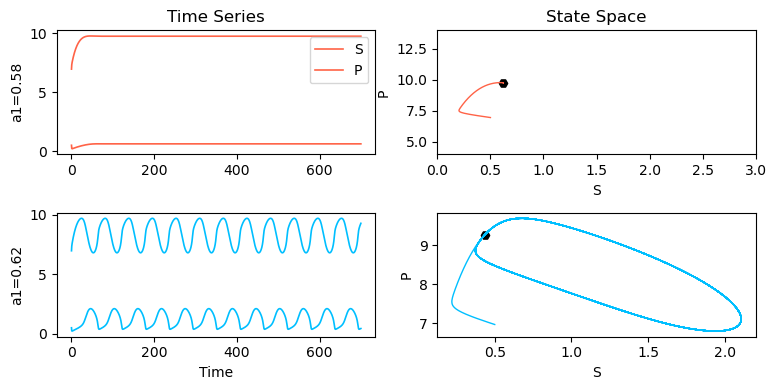

In [60]:
def model(t, variables, a1, b1, a2, b2, k_max, K_m, k_i, n, m, q):
    """Coupled system with feedback inhibition"""
    S, P = variables
    
    enzymatic_rate = (k_max * S**n) / (K_m**m + S**m) / (1 + k_i * P**q)
    
    dSdt = a1 - b1 * S - enzymatic_rate
    dPdt = a2 - b2 * P + enzymatic_rate
    
    return [dSdt, dPdt]

y0 = [0.5, 6.97]

a1 = [0.58, 0.62] 

a2      = 0.02
b1, b2  = 0.18, 0.05

k_max, K_m, k_i = 25.0, 0.7, 0.06
n, m, q = 1, 3, 3

t_span = (0, 700)

colors = ['tomato', 'deepskyblue']

fig, ax = subplots(ncols=2, nrows=2, figsize=(8, 4))

for index, color in enumerate(colors):
        
    solution = solve_ivp(model, t_span, y0, args=(a1[index], b1, a2, b2, k_max, K_m, k_i, n, m, q,), method='BDF', max_step=0.1)
    
    t = solution.t
    
    S = solution.y[0]
    P = solution.y[1]
    
    
    ax[index, 0].plot(t, S, label='S', linewidth=1.2, color=colors[index])
    ax[index, 0].plot(t, P, label='P', linewidth=1.2, color=colors[index])
    ax[index, 1].scatter(S[-1], P[-1], c='k', marker='H')
    ax[index, 1].plot(S, P, linewidth=1, color=colors[index]);
    ax[index, 0].set_ylabel(f'a1={a1[index]}')


ax[1, 0].set_xlabel('Time')
ax[0, 0].legend()
ax[0, 0].set_title('Time Series')

ax[0, 1].set_xlabel('S')
ax[1, 1].set_xlabel('S')
ax[0, 1].set_ylabel('P')
ax[1, 1].set_ylabel('P')
ax[0, 1].set_title('State Space')
ax[0, 1].set_xlim(0, 3)
ax[0, 1].set_ylim(4, 14)


fig.tight_layout()

In [50]:
around((S[-1], P[-1]), 2)


array([0.44, 9.28])

## State Space Nullclines

NULLCLINE ANALYSIS FOR OSCILLATORY SYSTEM
b1=0.18, b2=0.05
a1=0.65, a2=0.02
k_max=25.0, K_m=0.7
k_i=0.06
n=1, m=3, q=3

Computing S-nullcline...
Computing P-nullcline...
Finding fixed points...
Found 1 fixed point(s):
  FP1: S = 1.730, P = 7.172
Adding limit cycle from simulation...


/var/folders/cs/lkcj7j890kv6kfxbkl56w9h80000gn/T/ipykernel_57091/1885197421.py:130: RuntimeWarning:

The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.



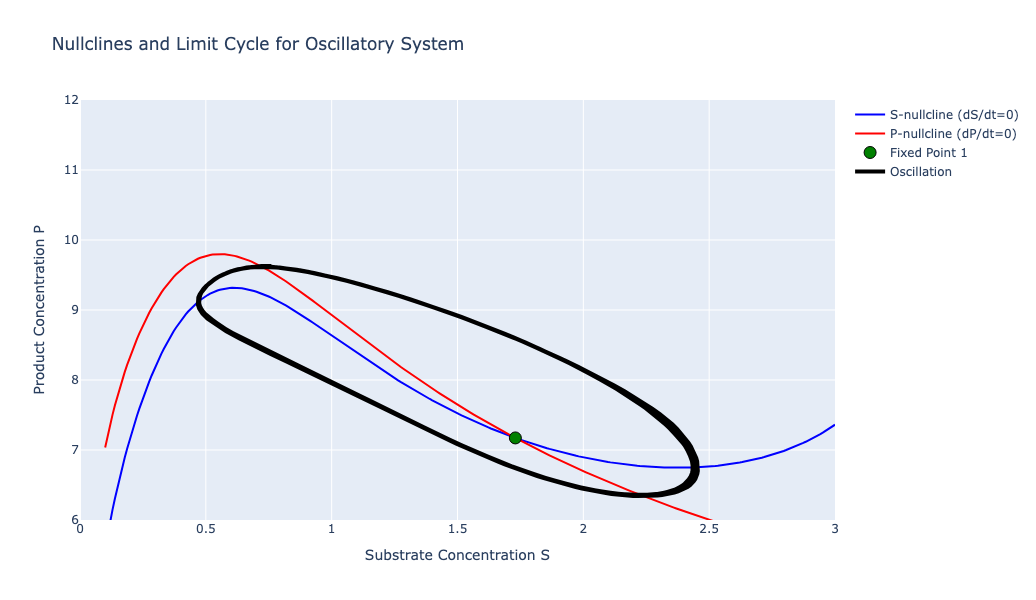


MATHEMATICAL ANALYSIS
Nullcline equations:
S-nullcline: a₁ - b₁·S = k_max·S/(K_m³ + S³) · 1/(1 + k_i·P²)
P-nullcline: a₂ - b₂·P = -k_max·S/(K_m³ + S³) · 1/(1 + k_i·P²)

Rearranged:
S-nullcline: P = √[(k_max·S/((a₁ - b₁·S)(K_m³ + S³)) - 1)/k_i]
P-nullcline: P = [a₂ + k_max·S/((K_m³ + S³)(1 + k_i·P²))]/b₂

Single fixed point at: S = 1.730, P = 7.172
This is typical for oscillatory systems - an unstable fixed point
surrounded by a stable limit cycle!
Fixed point appears STABLE

The purple limit cycle shows sustained oscillations around the fixed point!


In [3]:
import numpy as np
import plotly.graph_objects as go
from scipy.optimize import fsolve

# Oscillatory parameters
a1_fixed = 0.65

print("NULLCLINE ANALYSIS FOR OSCILLATORY SYSTEM")
print("="*50)
print(f"b1={b1}, b2={b2}")
print(f"a1={a1_fixed}, a2={a2}")
print(f"k_max={k_max}, K_m={K_m}")
print(f"k_i={k_i}")
print(f"n={n}, m={m}, q={q}")
print()

def enzymatic_rate(S, P):
    """Enzymatic rate with forward and feedback inhibition"""
    return (k_max * S**n) / (K_m**m + S**m) / (1 + k_i * P**q)

def S_nullcline(S, P):
    """S-nullcline: dS/dt = 0 => a1 - b1*S = v(S,P)"""
    return a1_fixed - b1*S - enzymatic_rate(S, P)

def P_nullcline(S, P):
    """P-nullcline: dP/dt = 0 => a2 - b2*P = -v(S,P)"""
    return a2       - b2*P + enzymatic_rate(S, P)

# Compute S-nullcline: For each S, find P such that dS/dt = 0
print("Computing S-nullcline...")
S_values = np.linspace(0.1, 3, 300)
P_S_null = []

for S in S_values:
    def equation(P):
        return S_nullcline(S, P)
    
    try:
        # Try multiple initial guesses
        solutions = []
        for P_guess in [5.0, 6.0, 7.0, 8.0]:
            result = fsolve(equation, P_guess)
            if (result[0] > 0 and result[0] < 15 and 
                abs(equation(result[0])) < 1e-6):
                solutions.append(result[0])
        
        # Remove duplicates and take the first valid solution
        if solutions:
            unique_solutions = []
            for sol in solutions:
                if not any(abs(sol - existing) < 0.1 for existing in unique_solutions):
                    unique_solutions.append(sol)
            P_S_null.append(unique_solutions[0])  # Take first branch for plotting
        else:
            P_S_null.append(np.nan)
    except:
        P_S_null.append(np.nan)

# Compute P-nullcline: For each S, find P such that dP/dt = 0
print("Computing P-nullcline...")
P_P_null = []

for S in S_values:
    def equation(P):
        return P_nullcline(S, P)
    
    try:
        # Try multiple initial guesses
        solutions = []
        for P_guess in [0.1, 1.0, 3.0, 5.0]:
            result = fsolve(equation, P_guess)
            if (result[0] > 0 and result[0] < 15 and 
                abs(equation(result[0])) < 1e-6):
                solutions.append(result[0])
        
        # Remove duplicates and take the first valid solution
        if solutions:
            unique_solutions = []
            for sol in solutions:
                if not any(abs(sol - existing) < 0.1 for existing in unique_solutions):
                    unique_solutions.append(sol)
            P_P_null.append(unique_solutions[0])  # Take first branch for plotting
        else:
            P_P_null.append(np.nan)
    except:
        P_P_null.append(np.nan)

# Create the phase portrait
fig = go.Figure()

# Plot S-nullcline
valid_S_S = []
valid_P_S = []
for S, P in zip(S_values, P_S_null):
    if not np.isnan(P):
        valid_S_S.append(S)
        valid_P_S.append(P)

fig.add_trace(go.Scatter(x=valid_S_S, y=valid_P_S, mode='lines',
                        name='S-nullcline (dS/dt=0)',
                        line=dict(color='blue', width=2)))

# Plot P-nullcline
valid_S_P = []
valid_P_P = []
for S, P in zip(S_values, P_P_null):
    if not np.isnan(P):
        valid_S_P.append(S)
        valid_P_P.append(P)

fig.add_trace(go.Scatter(x=valid_S_P, y=valid_P_P, mode='lines',
                        name='P-nullcline (dP/dt=0)',
                        line=dict(color='red', width=2)))

# Find fixed points (intersections)
print("Finding fixed points...")
fixed_points = []

# Search in S-P space
S_search = np.linspace(0.01, 1.2, 50)
P_search = np.linspace(9, 11, 50)

for S_guess in S_search:
    for P_guess in P_search:
        def equations(vars):
            S, P = vars
            return [S_nullcline(S, P), P_nullcline(S, P)]
        
        try:
            result = fsolve(equations, [S_guess, P_guess])
            S_sol, P_sol = result
            
            # Check if valid solution
            residuals = equations([S_sol, P_sol])
            if (np.linalg.norm(residuals) < 1e-4 and 
                S_sol > 0 and P_sol > 0 and 
                S_sol <= 2 and P_sol <= 15):
                
                # Check if new
                is_new = True
                for existing in fixed_points:
                    if (abs(S_sol - existing[0]) < 0.1 and 
                        abs(P_sol - existing[1]) < 0.1):
                        is_new = False
                        break
                
                if is_new:
                    fixed_points.append((S_sol, P_sol))
        except:
            continue

print(f"Found {len(fixed_points)} fixed point(s):")
for i, (S, P) in enumerate(fixed_points):
    print(f"  FP{i+1}: S = {S:.3f}, P = {P:.3f}")

# Plot fixed points
for i, (S, P) in enumerate(fixed_points):
    fig.add_trace(go.Scatter(x=[S], y=[P], mode='markers',
                            marker=dict(size=12, color='green', symbol='circle',
                                      line=dict(width=1, color='black')),
                            name=f'Fixed Point {i+1}'))

# Add a limit cycle from simulation to show oscillations
print("Adding limit cycle from simulation...")
from scipy.integrate import solve_ivp

def system_dynamics(t, variables):
    S, P = variables
    rate = enzymatic_rate(S, P)
    dSdt = a1_fixed - b1*S - rate
    dPdt = a2       - b2*P + rate
    return [dSdt, dPdt]

# Simulate to get limit cycle
sol = solve_ivp(system_dynamics, (0, 2000), [1.0, 1.0],
                t_eval=np.linspace(0, 2000, 5000), method='RK45')

# Use only the last part to avoid transients
S_cycle = sol.y[0][-2000:]
P_cycle = sol.y[1][-2000:]

fig.add_trace(go.Scatter(x=S_cycle, y=P_cycle, mode='lines',
                        name='Oscillation',
                        line=dict(color='black', width=4)))

# Update layout
fig.update_layout(
    title="Nullclines and Limit Cycle for Oscillatory System",
    xaxis_title="Substrate Concentration S",
    yaxis_title="Product Concentration P", 
    width=700,
    height=600,
    showlegend=True
)

fig.update_xaxes(range=[0, 3])
fig.update_yaxes(range=[6, 12])

fig.show()

# Mathematical analysis
print("\n" + "="*50)
print("MATHEMATICAL ANALYSIS")
print("="*50)

print("Nullcline equations:")
print("S-nullcline: a₁ - b₁·S = k_max·S/(K_m³ + S³) · 1/(1 + k_i·P²)")
print("P-nullcline: a₂ - b₂·P = -k_max·S/(K_m³ + S³) · 1/(1 + k_i·P²)")
print()
print("Rearranged:")
print("S-nullcline: P = √[(k_max·S/((a₁ - b₁·S)(K_m³ + S³)) - 1)/k_i]")
print("P-nullcline: P = [a₂ + k_max·S/((K_m³ + S³)(1 + k_i·P²))]/b₂")
print()

if len(fixed_points) == 1:
    S_fp, P_fp = fixed_points[0]
    print(f"Single fixed point at: S = {S_fp:.3f}, P = {P_fp:.3f}")
    print("This is typical for oscillatory systems - an unstable fixed point")
    print("surrounded by a stable limit cycle!")
    
    # Check stability roughly by simulating nearby
    sol_test = solve_ivp(system_dynamics, (0, 50), [S_fp + 0.1, P_fp + 0.1],
                        t_eval=[0, 50], method='RK45')
    final_S, final_P = sol_test.y[0, -1], sol_test.y[1, -1]
    distance = np.sqrt((final_S - S_fp)**2 + (final_P - P_fp)**2)
    
    if distance > 0.5:
        print("Fixed point appears UNSTABLE (spiral source)")
    else:
        print("Fixed point appears STABLE")

print("\nThe purple limit cycle shows sustained oscillations around the fixed point!")

## Oscillation animation 

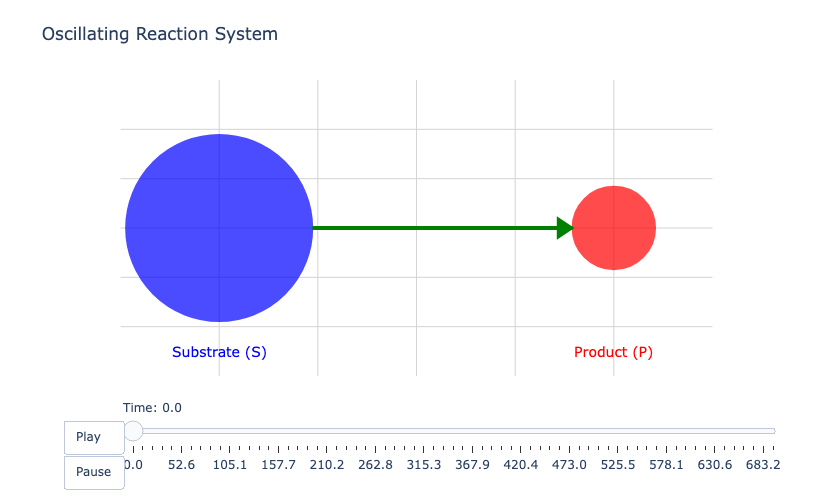

In [1]:
import numpy as np
import plotly.graph_objects as go
from scipy.integrate import solve_ivp

# Your model definition
def model(t, variables, a1, b1, a2, b2, k_max, K_m, k_i, n, m, q):
    """Coupled system with feedback inhibition"""
    S, P = variables
    
    enzymatic_rate = (k_max * S**n) / (K_m**m + S**m) / (1 + k_i * P**q)
    
    dSdt = a1 - b1 * S - enzymatic_rate
    dPdt = a2 - b2 * P + enzymatic_rate
    
    return [dSdt, dPdt]

# Parameters
S_0 = 1.97
P_0 = 6.97
b1, b2 = 0.18, 0.05
a1, a2 = 0.62, 0.02
k_max, K_m, k_i = 25.0, 0.7, 0.06
n, m, q = 1, 3, 3
t_span = (0, 700)

# Solve the ODE
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Even fewer points for stability
sol = solve_ivp(model, t_span, [S_0, P_0], args=(a1, b1, a2, b2, k_max, K_m, k_i, n, m, q), 
                t_eval=t_eval, method='RK45')

S_sol = sol.y[0]
P_sol = sol.y[1]
t_sol = sol.t

# Normalize for circle radii - using pixel units for shapes
min_radius, max_radius = 15, 40
S_radius = min_radius + (max_radius - min_radius) * (S_sol - np.min(S_sol)) / (np.max(S_sol) - np.min(S_sol))
P_radius = min_radius + (max_radius - min_radius) * (P_sol - np.min(P_sol)) / (np.max(P_sol) - np.min(P_sol))

# Fixed positions
S_pos = [-4, 0]
P_pos = [4, 0]

# Create the figure with shapes (much more stable than scatter plots)
fig = go.Figure()

# Create frames using shapes instead of scatter plots
frames = []
for i in range(len(t_sol)):
    frame_data = [
        # S circle as shape
        dict(
            type="circle",
            xref="x", yref="y",
            x0=S_pos[0] - S_radius[i]/20,  # Divide by scaling factor
            y0=S_pos[1] - S_radius[i]/20,
            x1=S_pos[0] + S_radius[i]/20,
            y1=S_pos[1] + S_radius[i]/20,
            line_color="blue",
            fillcolor="blue",
            line_width=2,
            opacity=0.7
        ),
        # P circle as shape
        dict(
            type="circle",
            xref="x", yref="y",
            x0=P_pos[0] - P_radius[i]/20,
            y0=P_pos[1] - P_radius[i]/20,
            x1=P_pos[0] + P_radius[i]/20,
            y1=P_pos[1] + P_radius[i]/20,
            line_color="red",
            fillcolor="red",
            line_width=2,
            opacity=0.7
        ),
        # Arrow line
        dict(
            type="line",
            xref="x", yref="y",
            x0=S_pos[0] + S_radius[i]/20,
            y0=S_pos[1],
            x1=P_pos[0] - P_radius[i]/20,
            y1=P_pos[1],
            line=dict(color="green", width=4)
        ),
        # Arrow head
        dict(
            type="path",
            xref="x", yref="y",
            path=f"M {P_pos[0] - P_radius[i]/20 - 0.3} {P_pos[1] - 0.2} L {P_pos[0] - P_radius[i]/20} {P_pos[1]} L {P_pos[0] - P_radius[i]/20 - 0.3} {P_pos[1] + 0.2} Z",
            line_color="green",
            fillcolor="green"
        )
    ]

    frame = go.Frame(
        data=[],  # No scatter data
        layout=dict(
            shapes=frame_data,
            # annotations=text_annotations
        ),
        name=f'frame_{i}'
    )
    frames.append(frame)

# Add initial shapes
fig.add_shape(
    type="circle",
    xref="x", yref="y",
    x0=S_pos[0] - S_radius[0]/20,
    y0=S_pos[1] - S_radius[0]/20,
    x1=S_pos[0] + S_radius[0]/20,
    y1=S_pos[1] + S_radius[0]/20,
    line_color="blue",
    fillcolor="blue",
    line_width=2,
    opacity=0.7
)

fig.add_shape(
    type="circle",
    xref="x", yref="y",
    x0=P_pos[0] - P_radius[0]/20,
    y0=P_pos[1] - P_radius[0]/20,
    x1=P_pos[0] + P_radius[0]/20,
    y1=P_pos[1] + P_radius[0]/20,
    line_color="red",
    fillcolor="red", 
    line_width=2,
    opacity=0.7
)

fig.add_shape(
    type="line",
    xref="x", yref="y",
    x0=S_pos[0] + S_radius[0]/20,
    y0=S_pos[1],
    x1=P_pos[0] - P_radius[0]/20,
    y1=P_pos[1],
    line=dict(color="green", width=4)
)

fig.add_shape(
    type="path",
    xref="x", yref="y",
    path=f"M {P_pos[0] - P_radius[0]/20 - 0.3} {P_pos[1] - 0.2} L {P_pos[0] - P_radius[0]/20} {P_pos[1]} L {P_pos[0] - P_radius[0]/20 - 0.3} {P_pos[1] + 0.2} Z",
    line_color="green",
    fillcolor="green"
)

# Add initial annotations
fig.add_annotation(
    x=S_pos[0],
    y=S_pos[1] - max(S_radius[0], P_radius[0])/15 - 0.8,
    # text=f"S: {S_sol[0]:.2f}",
    showarrow=False,
    font=dict(color="blue", size=12),
    xref="x",
    yref="y"
)

fig.add_annotation(
    x=P_pos[0],
    y=P_pos[1] - max(S_radius[0], P_radius[0])/15 - 0.8,
    # text=f"P: {P_sol[0]:.2f}",
    showarrow=False,
    font=dict(color="red", size=12),
    xref="x",
    yref="y"
)

# Configure animation
fig.frames = frames

# Animation controls
sliders = [dict(
    steps=[dict(
        method="animate",
        args=[[f'frame_{k}'], 
              dict(mode="immediate", frame=dict(duration=50, redraw=True), 
                   transition=dict(duration=0))],
        label=f'{t_sol[k]:.1f}'
    ) for k in range(0, len(t_sol), 15)],
    active=0,
    currentvalue=dict(prefix="Time: ", visible=True),
    len=0.9,
    x=0.1,
    y=0
)]

updatemenus = [dict(
    type="buttons",
    showactive=False,
    buttons=[
        dict(label="Play", method="animate",
             args=[None, dict(frame=dict(duration=50, redraw=True), 
                             fromcurrent=True, mode="immediate")]),
        dict(label="Pause", method="animate",
             args=[[None], dict(frame=dict(duration=0, redraw=False), 
                               mode="immediate")])
    ],
    x=0.1, y=-0.15,
    xanchor="right",
    yanchor="top"
)]

# Update layout with FIXED ranges and no auto-scaling
fig.update_layout(
    title="Oscillating Reaction System",
    xaxis=dict(
        range=[-6, 6],  # Fixed range
        showticklabels=False,
        showgrid=True,
        gridcolor="lightgray",
        zeroline=False,
        fixedrange=True,  # Prevent any scaling
        constrain="domain"
    ),
    yaxis=dict(
        range=[-3, 3],  # Fixed range
        showticklabels=False,
        showgrid=True,
        gridcolor="lightgray",
        zeroline=False,
        fixedrange=True,  # Prevent any scaling
        scaleanchor="x",
        scaleratio=1
    ),
    plot_bgcolor="white",
    width=800,
    height=500,
    showlegend=False,
    sliders=sliders,
    updatemenus=updatemenus,
    # Critical: disable all auto-scaling and layout recalculations
    autosize=False,
    margin=dict(l=50, r=50, t=80, b=80)
)

# Add static labels
fig.add_annotation(
    x=S_pos[0], y=-2.5,
    text="Substrate (S)",
    showarrow=False,
    font=dict(color="blue", size=14),
    xref="x",
    yref="y"
)

fig.add_annotation(
    x=P_pos[0], y=-2.5,
    text="Product (P)",
    showarrow=False,
    font=dict(color="red", size=14),
    xref="x", 
    yref="y"
)

fig.show()